In [1]:
import os

def convert_list_to_rttm(list_folder, output_folder):
    os.makedirs(output_folder, exist_ok=True)

    for fname in os.listdir(list_folder):
        if not fname.endswith(".list"):
            continue

        list_path = os.path.join(list_folder, fname)
        rttm_path = os.path.join(output_folder, fname.replace(".list", ".rttm"))

        with open(list_path, 'r') as fin, open(rttm_path, 'w') as fout:
            for line in fin:
                line = line.strip()
                if not line or line.startswith('#'):
                    continue

                try:
                    start_time, end_time, speaker_id, path, *_ = line.split(maxsplit=5)
                    start_time = float(start_time)
                    end_time = float(end_time)
                    duration = end_time - start_time
                    assert duration > 0
                    recording_id = os.path.splitext(os.path.basename(list_path))[0]

                    rttm_line = f"SPEAKER {recording_id} 1 {start_time:.3f} {duration:.3f} <NA> <NA> {speaker_id} <NA> <NA>\n"
                    fout.write(rttm_line)
                except Exception as e:
                    print(f"Skipping line in {fname}: {line}")
                    print(f"Reason: {e}")
                    continue

        print(f"Converted: {fname} → {os.path.basename(rttm_path)}")

# === 修改此处路径 ===
list_folder = "/mmu-audio-ssd/zhenghaorui/others/SD/Large-scale-diarization-dataset/exp/exp2/test/samples"       # 存放 .list 文件的目录
output_folder = "/mmu-audio-ssd/zhenghaorui/others/SD/Large-scale-diarization-dataset/exp/exp2/test/GT" # 转换后的 .rttm 存放目录

convert_list_to_rttm(list_folder, output_folder)


Converted: 00_00010_dis.list → 00_00010_dis.rttm
Converted: 06_00007_dis.list → 06_00007_dis.rttm
Converted: 04_00000_pre.list → 04_00000_pre.rttm
Converted: 07_00002_dis.list → 07_00002_dis.rttm
Converted: 00_00004_dis.list → 00_00004_dis.rttm
Converted: 03_00000_dis.list → 03_00000_dis.rttm
Converted: 05_00003_dis.list → 05_00003_dis.rttm
Converted: 04_00009_int.list → 04_00009_int.rttm
Converted: 05_00008_dis.list → 05_00008_dis.rttm
Converted: 04_00012_dis.list → 04_00012_dis.rttm
Converted: 00_00006_dis.list → 00_00006_dis.rttm
Converted: 02_00002_dis.list → 02_00002_dis.rttm
Converted: 01_00007_dis.list → 01_00007_dis.rttm
Converted: 06_00001_pre.list → 06_00001_pre.rttm
Converted: 07_00005_pre.list → 07_00005_pre.rttm
Converted: 02_00013_int.list → 02_00013_int.rttm
Converted: 06_00003_pre.list → 06_00003_pre.rttm
Converted: 06_00013_int.list → 06_00013_int.rttm
Converted: 01_00003_pre.list → 01_00003_pre.rttm
Converted: 00_00003_dis.list → 00_00003_dis.rttm
Converted: 00_00008_

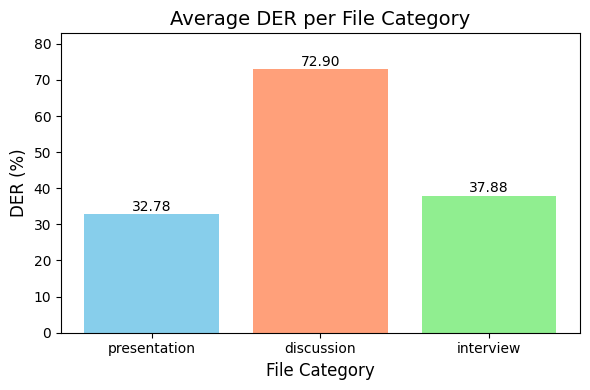

In [2]:
import matplotlib.pyplot as plt
from collections import defaultdict

# 读取路径
input_file = "/mmu-audio-ssd/zhenghaorui/others/SD/Large-scale-diarization-dataset/exp/exp1/der"  # 修改为你的文件名

# 初始化结构
category_der = defaultdict(list)

# 读取并分类
with open(input_file, "r") as f:
    lines = f.readlines()

# 跳过表头（前2行）
for line in lines[2:]:
    parts = line.strip().split()
    if len(parts) < 2:
        continue
    try:
        file_id = parts[0]
        der = float(parts[1])
        
        # 提取后缀类别
        if file_id.endswith("_pre"):
            category = "presentation"
        elif file_id.endswith("_dis"):
            category = "discussion"
        elif file_id.endswith("_int"):
            category = "interview"
        else:
            continue  # 跳过未知类别

        category_der[category].append(der)
    except:
        pass

# 计算平均值
category_avg = {cat: sum(values) / len(values) for cat, values in category_der.items()}

# 画图
categories = list(category_avg.keys())
averages = [category_avg[cat] for cat in categories]

plt.figure(figsize=(6, 4))
bars = plt.bar(categories, averages, color=["#87CEEB", "#FFA07A", "#90EE90"])
plt.title("Average DER per File Category", fontsize=14)
plt.xlabel("File Category", fontsize=12)
plt.ylabel("DER (%)", fontsize=12)
plt.ylim(0, max(averages) + 10)

# 添加数值标签
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1, f"{yval:.2f}", ha='center', fontsize=10)

plt.tight_layout()
plt.show()


{'0000000_pre': 26.83, '0000001_dis': 87.1, '0000002_int': 53.75, '0000003_pre': 15.55, '0000004_int': 42.46, '0000005_int': 21.94, '0000006_pre': 22.51, '0000007_int': 15.73, '0000008_pre': 61.61, '0000009_dis': 76.18, '0000010_pre': 30.08, '0000011_int': 39.13, '0000012_int': 40.02, '0000013_dis': 90.81, '0000014_dis': 85.11, '0000015_int': 58.14, '0000016_pre': 13.73, '0000017_pre': 33.88, '0000018_dis': 49.99, '0000019_dis': 48.31, '0000020_int': 18.69, '0000021_int': 76.23, '0000022_pre': 34.85, '0000023_int': 45.12, '0000024_int': 31.44, '0000025_pre': 41.73, '0000026_dis': 77.35, '0000027_dis': 60.97, '0000028_int': 16.83, '0000029_dis': 62.94, '0000030_dis': 60.09, '0000031_dis': 84.92, '0000032_int': 30.43, '0000033_int': 37.31, '0000034_int': 35.11, '0000035_dis': 91.83, '0000036_pre': 24.6, '0000037_dis': 71.53, '0000038_pre': 17.2, '0000039_pre': 13.6, '0000040_pre': 17.32, '0000041_pre': 47.95, '0000042_int': 76.04, '0000043_pre': 36.7, '0000044_int': 19.23, '0000045_int':

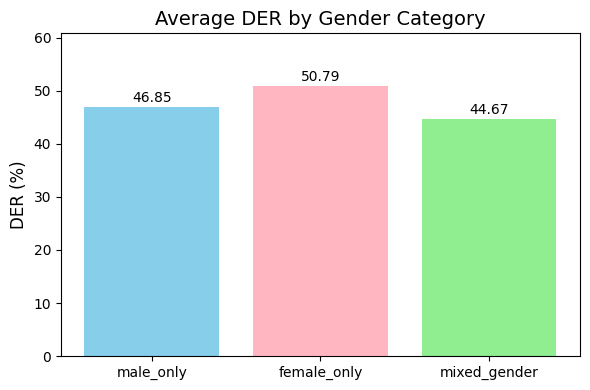

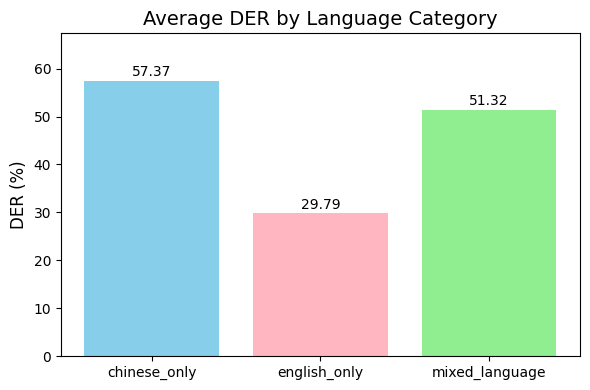

In [3]:
import os
import json
import matplotlib.pyplot as plt
from collections import defaultdict

# === 配置路径 ===

list_dir = "/mmu-audio-ssd/zhenghaorui/others/SD/Large-scale-diarization-dataset/exp/exp1/samples"  # your RTTM folder path
json_files = [
    "/mmu-audio-ssd/zhenghaorui/others/SD/Large-scale-diarization-dataset/metadata/Chinese/aishell-1/speakers_male.json",
    "/mmu-audio-ssd/zhenghaorui/others/SD/Large-scale-diarization-dataset/metadata/Chinese/aishell-1/speakers_female.json",
    "/mmu-audio-ssd/zhenghaorui/others/SD/Large-scale-diarization-dataset/metadata/English/librispeech/speakers_male.json",
    "/mmu-audio-ssd/zhenghaorui/others/SD/Large-scale-diarization-dataset/metadata/English/librispeech/speakers_female.json"
]
der_file = "/mmu-audio-ssd/zhenghaorui/others/SD/Large-scale-diarization-dataset/exp/exp1/der"                # DER 统计文件路径


# === 步骤 1: 加载 speaker_id 信息 ===
speaker_info = {}
for json_path in json_files:
    with open(json_path, 'r') as f:
        data = json.load(f)
        for entry in data:
            speaker_id = entry['speaker_id']
            gender = entry['gender'].lower()
            language = entry['language'].lower()
            speaker_info[speaker_id] = {'gender': gender, 'language': language}


# === 步骤 2: 加载 DER 数据 ===
file_der = {}
with open(der_file, 'r') as f:
    lines = f.readlines()[2:]  # 跳过前两行头部
    for line in lines:
        parts = line.strip().split()
        if len(parts) < 2:
            continue
        try:
            file_id = parts[0]
            der = float(parts[1])
            file_der[file_id] = der
        except: 
            pass
print(file_der)

# === 步骤 3: 分析每个 list 文件的 speaker 信息 ===
gender_groups = {'male_only': [], 'female_only': [], 'mixed_gender': []}
language_groups = {'chinese_only': [], 'english_only': [], 'mixed_language': []}

for file_id in file_der:
    list_path = os.path.join(list_dir, file_id + ".list")
    if not os.path.exists(list_path):
        print(f"List file not found: {list_path}")
        continue

    speaker_set = set()
    gender_set = set()
    language_set = set()

    with open(list_path, 'r') as f:
        for line in f:
            parts = line.strip().split()
            if len(parts) < 3:
                continue
            speaker_id = parts[2]
            speaker_set.add(speaker_id)

    for spk in speaker_set:
        if spk not in speaker_info:
            print(f"Unknown speaker_id: {spk}")
            continue
        gender_set.add(speaker_info[spk]['gender'])
        language_set.add(speaker_info[spk]['language'])

    # 分类性别
    if gender_set == {'male'}:
        gender_groups['male_only'].append(file_der[file_id])
    elif gender_set == {'female'}:
        gender_groups['female_only'].append(file_der[file_id])
    else:
        gender_groups['mixed_gender'].append(file_der[file_id])

    # 分类语言
    if language_set == {'chinese'}:
        language_groups['chinese_only'].append(file_der[file_id])
    elif language_set == {'english'}:
        language_groups['english_only'].append(file_der[file_id])
    else:
        language_groups['mixed_language'].append(file_der[file_id])

# === 步骤 4: 计算平均 DER ===
def compute_avg(group_dict):
    return {k: sum(v)/len(v) if v else 0 for k, v in group_dict.items()}

gender_avg = compute_avg(gender_groups)
language_avg = compute_avg(language_groups)

# === 步骤 5: 画图 ===
def plot_bar(data_dict, title, ylabel):
    categories = list(data_dict.keys())
    values = [data_dict[k] for k in categories]
    plt.figure(figsize=(6, 4))
    bars = plt.bar(categories, values, color=['#87CEEB', '#FFB6C1', '#90EE90'])
    plt.title(title, fontsize=14)
    plt.ylabel(ylabel, fontsize=12)
    plt.ylim(0, max(values) + 10)
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval + 1, f"{yval:.2f}", ha='center', fontsize=10)
    plt.tight_layout()
    plt.show()

# 性别分类图
plot_bar(gender_avg, "Average DER by Gender Category", "DER (%)")

# 语言分类图
plot_bar(language_avg, "Average DER by Language Category", "DER (%)")


In [ ]:
import os
import argparse
import matplotlib.pyplot as plt
import matplotlib.patches as patches

def parse_rttm(file_path):
    segments = {}
    with open(file_path, 'r') as file:
        for line in file:
            parts = line.strip().split()
            if len(parts) != 10:
                continue
            speaker = parts[7]
            start_time = float(parts[3])
            duration = float(parts[4])
            end_time = start_time + duration
            
            if speaker not in segments:
                segments[speaker] = []
            segments[speaker].append((start_time, end_time))
    return segments

def plot_segments(segments, total_duration, output_path,title, time_points=None):
    fig, ax = plt.subplots(figsize=(12, 6))
    colors = plt.cm.tab20.colors  # 用于分配不同颜色
    y_labels = list(segments.keys())
    
    for idx, (speaker, times) in enumerate(segments.items()):
        for start, end in times:
            ax.add_patch(
                patches.Rectangle(
                    (start, idx - 0.4),  # (x, y)
                    end - start,  # width
                    0.4,  # height
                    color=colors[(idx+1) % len(colors)]
                )
            )
    
    if time_points:
        ground_truth_y = len(y_labels)
        y_labels.append('Groundtruth')
        for i in range(len(time_points) - 1):
            start = time_points[i]
            end = time_points[i + 1]
            color = colors[i % 2]  
            ax.add_patch(
                patches.Rectangle(
                    (start, ground_truth_y - 0.4),  # (x, y)
                    end - start,  # width
                    0.4,  # height
                    color=color
                )
            )
    
    ax.set_yticks(range(len(y_labels)))
    ax.set_yticklabels(y_labels)
    ax.set_ylim(-0.8, len(y_labels) - 0.8)  
    ax.set_xlim(0, total_duration)
    ax.set_xlabel('Time (s)')
    ax.set_ylabel('Speakers')
    ax.set_title(title)
    ax.grid(True)
    plt.savefig(output_path)
    plt.close()

def process_rttm_file(input_file_path, output_file_path, total_duration, title, time_points=None):
    
    segments = parse_rttm(input_file_path)
    plot_segments(segments, total_duration, output_file_path, title, time_points)

if __name__ == "__main__":

    input_file_path = "/home/getsum/code/temp/reclustering/others_method/wespeaker/res/DH_EVAL_0175.rttm"
    output_file_path = "temp.png"
    total_duration = 600
    title = "DH_EVAL_0175"
    time_points = None

    process_rttm_file(input_file_path, output_file_path, total_duration, title ,time_points)



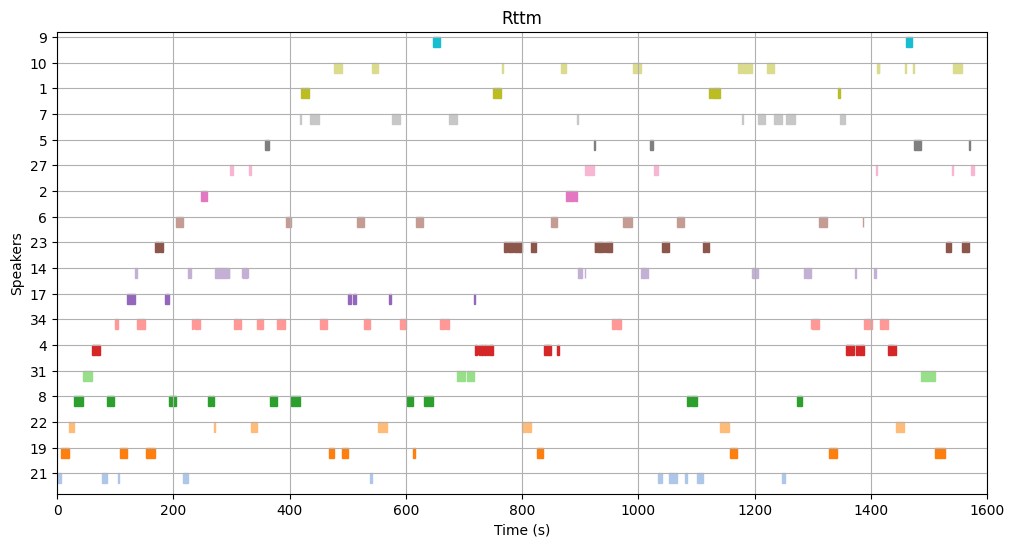

In [14]:
import os
import argparse
import matplotlib.pyplot as plt
import matplotlib.patches as patches

def parse_rttm(file_path):
    segments = {}
    with open(file_path, 'r') as file:
        for line in file:
            parts = line.strip().split()
            if len(parts) != 10:
                continue
            speaker = parts[7]
            start_time = float(parts[3])
            duration = float(parts[4])
            end_time = start_time + duration
            
            if speaker not in segments:
                segments[speaker] = []
            segments[speaker].append((start_time, end_time))
    return segments

def plot_segments(segments, total_duration, output_path,title, time_points=None):
    fig, ax = plt.subplots(figsize=(12, 6))
    colors = plt.cm.tab20.colors  # 用于分配不同颜色
    y_labels = list(segments.keys())
    
    for idx, (speaker, times) in enumerate(segments.items()):
        for start, end in times:
            ax.add_patch(
                patches.Rectangle(
                    (start, idx - 0.4),  # (x, y)
                    end - start,  # width
                    0.4,  # height
                    color=colors[(idx+1) % len(colors)]
                )
            )
    
    if time_points:
        ground_truth_y = len(y_labels)
        y_labels.append('Groundtruth')
        for i in range(len(time_points) - 1):
            start = time_points[i]
            end = time_points[i + 1]
            color = colors[i % 2]  
            ax.add_patch(
                patches.Rectangle(
                    (start, ground_truth_y - 0.4),  # (x, y)
                    end - start,  # width
                    0.4,  # height
                    color=color
                )
            )
    
    ax.set_yticks(range(len(y_labels)))
    ax.set_yticklabels(y_labels)
    ax.set_ylim(-0.8, len(y_labels) - 0.8)  
    ax.set_xlim(0, total_duration)
    ax.set_xlabel('Time (s)')
    ax.set_ylabel('Speakers')
    ax.set_title(title)
    ax.grid(True)
    plt.savefig(output_path)
    plt.show()
    plt.close()

def process_rttm_file(input_file_path, output_file_path, total_duration, title, time_points=None):
    
    segments = parse_rttm(input_file_path)
    plot_segments(segments, total_duration, output_file_path, title, time_points)

if __name__ == "__main__":
    
    input_file_path = "/mmu-audio-ssd/zhenghaorui/others/SD/Large-scale-diarization-dataset/exp/exp1/no_noise/res/0000092_dis.rttm"
    output_file_path = "92_dis_clean.png"
    total_duration = 1600
    title = "Rttm"
    time_points = None
    process_rttm_file(input_file_path, output_file_path, total_duration, title ,time_points)

    # parser = argparse.ArgumentParser(description="Process RTTM file and generate a plot.")
    # parser.add_argument('input_file_path', type=str, help='Path to the input RTTM file')
    # parser.add_argument('output_file_path', type=str, help='Path to the output image file')
    # parser.add_argument('--total_duration', type=float, required=True, help='Total duration of the audio segment in seconds')
    # parser.add_argument('--title', type=str, required=True, help='Figure title')
    # parser.add_argument('--time_points', nargs='*', type=float, help='Optional time points for ground truth')

    # args = parser.parse_args()

    # process_rttm_file(args.input_file_path, args.output_file_path, args.total_duration, args.title ,args.time_points)

In [3]:
#!/usr/bin/env python3

import sys
import os
from pathlib import Path

def process_rttm_file(file_path: Path, out_file):
    fname = file_path.stem  # 文件名不带扩展名
    with file_path.open('r', encoding='utf-8') as f:
        for line in f:
            line = line.strip()
            if not line or line.startswith('#'):
                continue
            parts = line.split()
            if len(parts) < 2:
                continue
            parts[1] = fname
            out_file.write(" ".join(parts) + "\n")

def merge_rttm_dir(input_dir: Path, output_path: Path):
    with output_path.open('w', encoding='utf-8') as fout:
        for p in sorted(input_dir.glob("*.rttm")):
            print(f"正在处理 {p.name}")
            process_rttm_file(p, fout)
    print(f"已生成合并文件：{output_path}")




input_dir = Path("/mmu-audio-ssd/zhenghaorui/others/SD/Large-scale-diarization-dataset/exp/exp2/test/results/pyannote/noisy/rttm")
output_rttm = Path("/mmu-audio-ssd/zhenghaorui/others/SD/Large-scale-diarization-dataset/exp/exp2/test/results/pyannote/noisy/all.rttm")

if not input_dir.is_dir():
    print(f"错误：{input_dir} 不是一个有效目录")


merge_rttm_dir(input_dir, output_rttm)




正在处理 00_00000_pre.rttm
正在处理 00_00001_dis.rttm
正在处理 00_00002_dis.rttm
正在处理 00_00003_dis.rttm
正在处理 00_00004_dis.rttm
正在处理 00_00005_pre.rttm
正在处理 00_00006_dis.rttm
正在处理 00_00007_int.rttm
正在处理 00_00008_dis.rttm
正在处理 00_00009_pre.rttm
正在处理 00_00010_dis.rttm
正在处理 00_00011_pre.rttm
正在处理 00_00012_pre.rttm
正在处理 00_00013_int.rttm
正在处理 01_00000_dis.rttm
正在处理 01_00001_dis.rttm
正在处理 01_00002_dis.rttm
正在处理 01_00003_pre.rttm
正在处理 01_00004_pre.rttm
正在处理 01_00005_dis.rttm
正在处理 01_00006_pre.rttm
正在处理 01_00007_dis.rttm
正在处理 01_00008_dis.rttm
正在处理 01_00009_pre.rttm
正在处理 01_00010_pre.rttm
正在处理 01_00011_pre.rttm
正在处理 01_00012_dis.rttm
正在处理 01_00013_int.rttm
正在处理 02_00000_dis.rttm
正在处理 02_00001_dis.rttm
正在处理 02_00002_dis.rttm
正在处理 02_00003_int.rttm
正在处理 02_00004_int.rttm
正在处理 02_00005_dis.rttm
正在处理 02_00006_pre.rttm
正在处理 02_00007_int.rttm
正在处理 02_00008_dis.rttm
正在处理 02_00009_int.rttm
正在处理 02_00010_pre.rttm
正在处理 02_00011_dis.rttm
正在处理 02_00012_dis.rttm
正在处理 02_00013_int.rttm
正在处理 03_00000_dis.rttm
正在处理 03_000